Step1. 데이터 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/zzhining/ml_basic/main/dataset/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
df.shape

(200, 5)

Step2. 데이터 탐색

In [3]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
df['Gender'].value_counts()

,count
Gender,
Female,112
Male,88


<Axes: xlabel='Gender', ylabel='count'>

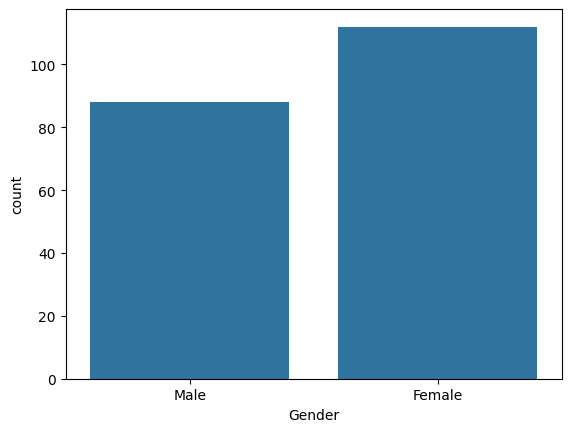

In [5]:
sns.countplot(x=df['Gender'])

<Axes: xlabel='Gender', ylabel='Annual Income (k$)'>

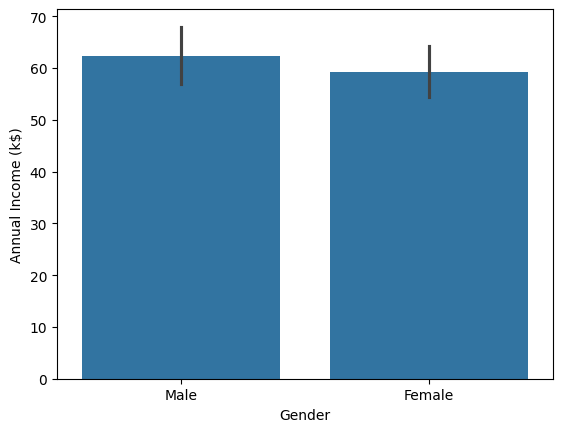

In [6]:
sns.barplot(x='Gender', y='Annual Income (k$)', data=df)

<Axes: xlabel='Gender', ylabel='Spending Score (1-100)'>

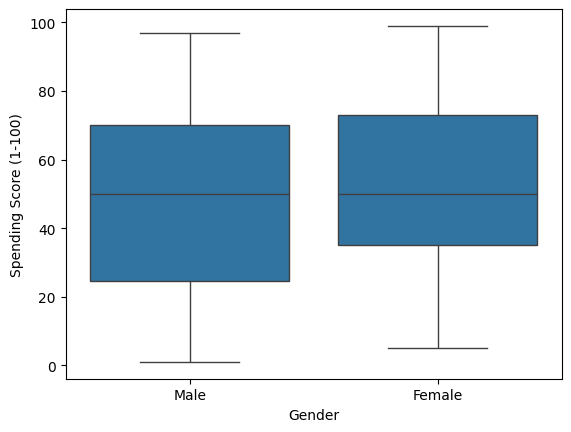

In [7]:
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df)

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

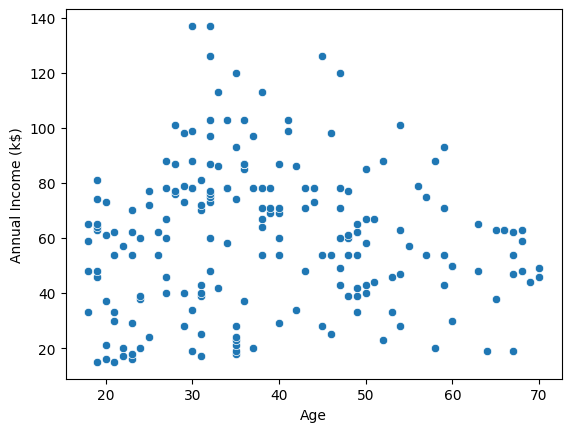

In [9]:
sns.scatterplot(x='Age', y='Annual Income (k$)', data=df)

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

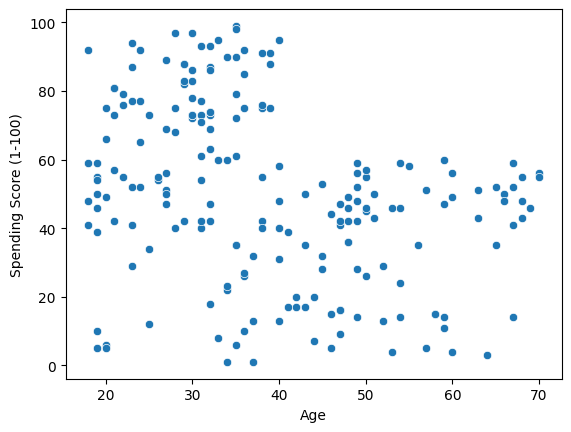

In [11]:
sns.scatterplot(x='Age', y= 'Spending Score (1-100)', data=df)

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

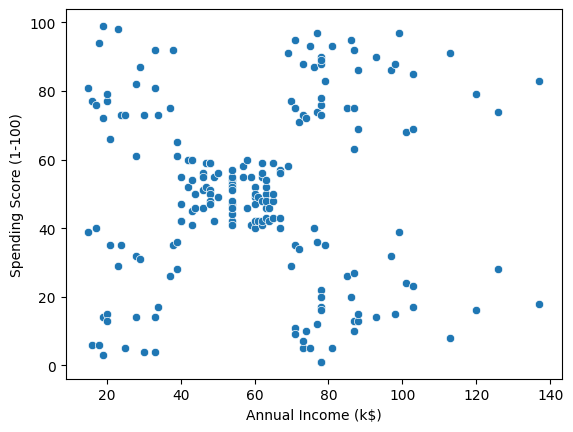

In [12]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)

Step3. 데이터 전처리

In [14]:
# Customer ID 삭제
df.drop(['CustomerID'], axis=1, inplace = True)

In [15]:
# Gender 컬럼 수치형 변수로 변경
df['Gender'] = df['Gender'].apply(lambda x : 0 if x == 'Male' else 1)

In [16]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [17]:
# 스케일 변환
from sklearn.preprocessing import StandardScaler
X = df.iloc[:, 1:]
sc = StandardScaler()
X = sc.fit_transform(X)

Step4. 학습 - KMeans

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

km = KMeans(n_clusters=2, random_state=0)
y_preds = km.fit_predict(X)
df['cluster'] = y_preds

print('실루엣 점수: {0:.4f}'.format(silhouette_score(X, y_preds)))

실루엣 점수: 0.3355


<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

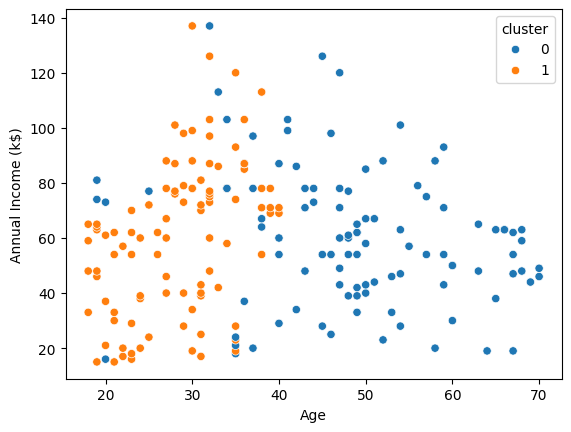

In [23]:
sns.scatterplot(x='Age', y='Annual Income (k$)', data=df, hue='cluster')

In [24]:
# 최적의 k 찾기
silhouette_avg = []
for k in range(10):
  model = KMeans(n_clusters=k+2, random_state=0)
  y_preds = model.fit_predict(X)
  score = silhouette_score(X, y_preds)
  silhouette_avg.append(score)
  print("군집개수: {0}개, 평균 실루엣 점수 : {1:.4f}".format(k+2, score))

군집개수: 2개, 평균 실루엣 점수 : 0.3355
군집개수: 3개, 평균 실루엣 점수 : 0.3503
군집개수: 4개, 평균 실루엣 점수 : 0.3498
군집개수: 5개, 평균 실루엣 점수 : 0.4166
군집개수: 6개, 평균 실루엣 점수 : 0.3926
군집개수: 7개, 평균 실루엣 점수 : 0.4219
군집개수: 8개, 평균 실루엣 점수 : 0.4093
군집개수: 9개, 평균 실루엣 점수 : 0.3766
군집개수: 10개, 평균 실루엣 점수 : 0.4162
군집개수: 11개, 평균 실루엣 점수 : 0.4094


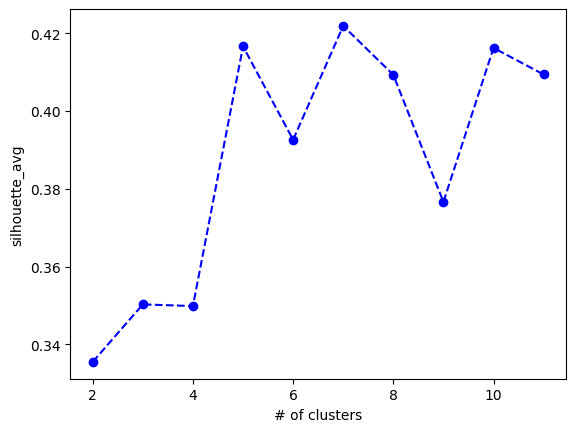

In [25]:
plt.plot(range(2,12), silhouette_avg, 'bo--')
plt.xlabel('# of clusters')
plt.ylabel('silhouette_avg')
plt.show()

In [27]:
model = KMeans(n_clusters=6, random_state=0)
y_preds = model.fit_predict(X)
df['cluster'] = y_preds

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

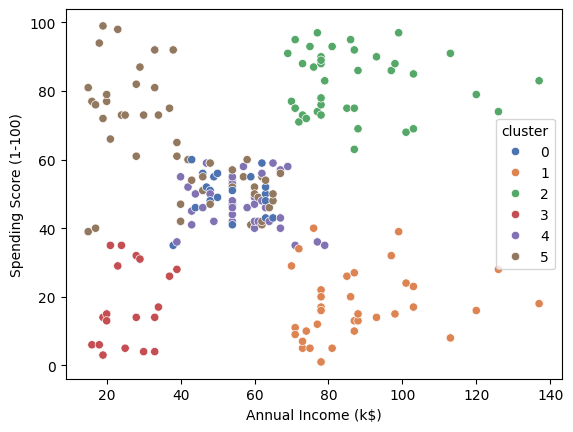

In [28]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue='cluster', palette='deep')

<Axes: xlabel='cluster', ylabel='Age'>

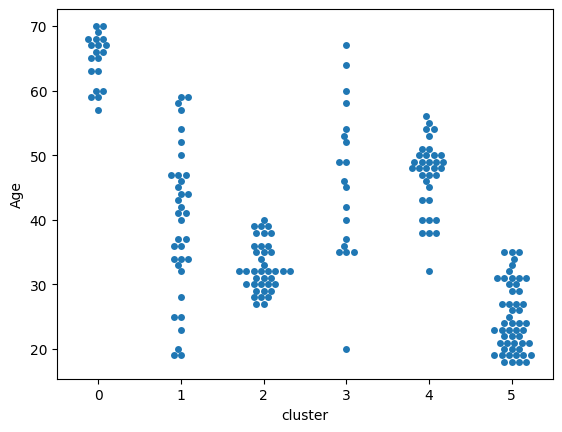

In [31]:
sns.swarmplot(x='cluster', y='Age', data=df)